In [1]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import janssen as jns

In [2]:
wavelength = 500e-9
dx = 1e-6
grid_size = (256, 256)

In [3]:
def plot_optical_wavefront(wf, title):
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    field = wf.field
    amplitude = jnp.abs(field)
    phase = jnp.angle(field)
    intensity = amplitude**2

    axes[0].imshow(amplitude, cmap="viridis")
    axes[0].axis("off")
    axes[0].set_title("Amplitude")

    axes[1].imshow(phase, cmap="twilight", vmin=-jnp.pi, vmax=jnp.pi)
    axes[1].axis("off")
    axes[1].set_title("Phase")

    axes[2].imshow(intensity, cmap="inferno")
    axes[2].axis("off")
    axes[2].set_title("Intensity")

    fig.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()


def plot_propagating_wavefront(beam, title, z_indices=[0, 12, 25, 37, 49]):
    fig, axes = plt.subplots(3, len(z_indices), figsize=(15, 9))

    for col, z_idx in enumerate(z_indices):
        field = beam.field[z_idx]
        amplitude = jnp.abs(field)
        phase = jnp.angle(field)
        intensity = amplitude**2

        axes[0, col].imshow(amplitude, cmap="viridis")
        axes[0, col].axis("off")
        axes[0, col].set_title(f"z = {beam.z_positions[z_idx]*1e3:.1f} mm")

        axes[1, col].imshow(phase, cmap="twilight", vmin=-jnp.pi, vmax=jnp.pi)
        axes[1, col].axis("off")

        axes[2, col].imshow(intensity, cmap="inferno")
        axes[2, col].axis("off")

    axes[0, 0].set_ylabel("Amplitude", fontsize=12)
    axes[1, 0].set_ylabel("Phase", fontsize=12)
    axes[2, 0].set_ylabel("Intensity", fontsize=12)

    fig.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()

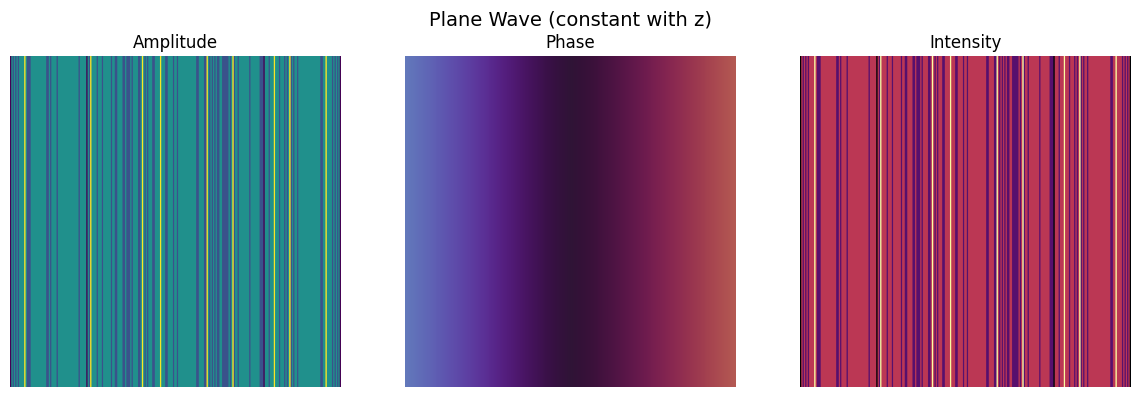

In [4]:
plane = jns.models.plane_wave(
    wavelength=wavelength,
    dx=dx,
    grid_size=grid_size,
    tilt_x=0.001,
)
plot_optical_wavefront(plane, "Plane Wave (constant with z)")

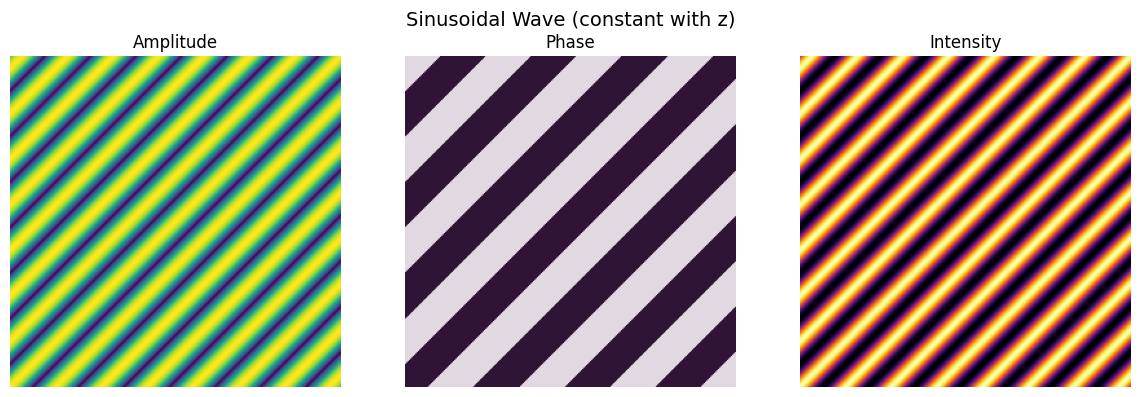

In [5]:
sinusoidal = jns.models.sinusoidal_wave(
    wavelength=wavelength,
    dx=dx,
    grid_size=grid_size,
    period=50e-6,
    direction=jnp.pi / 4,
)
plot_optical_wavefront(sinusoidal, "Sinusoidal Wave (constant with z)")

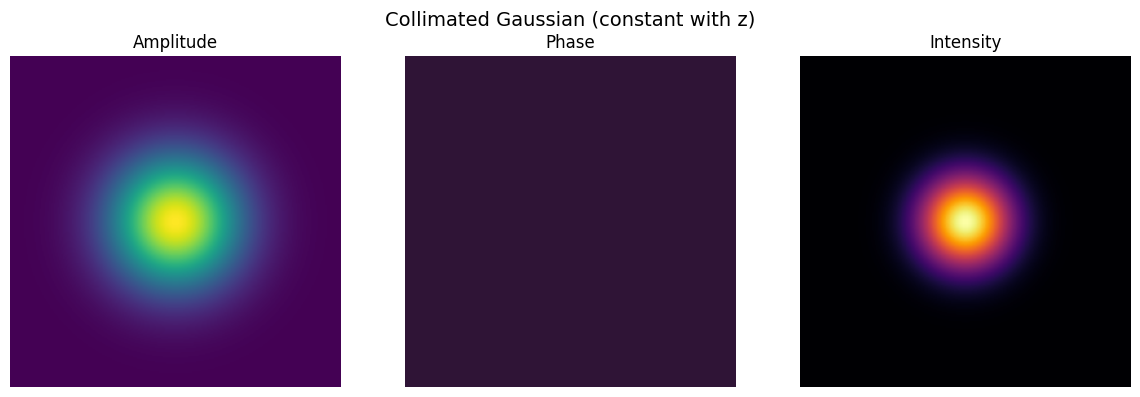

In [6]:
collimated = jns.models.collimated_gaussian(
    wavelength=wavelength,
    dx=dx,
    grid_size=grid_size,
    waist=50e-6,
)
plot_optical_wavefront(collimated, "Collimated Gaussian (constant with z)")

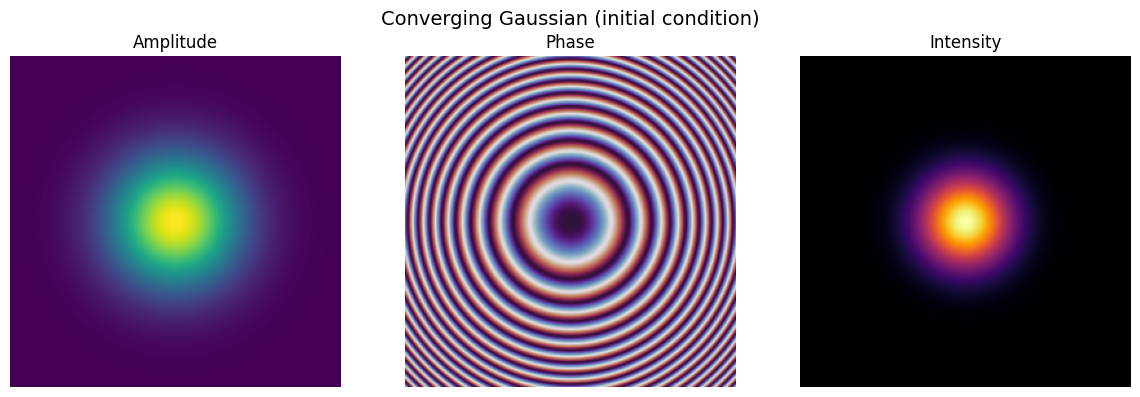

In [7]:
converging = jns.models.converging_gaussian(
    wavelength=wavelength,
    dx=dx,
    grid_size=grid_size,
    waist=50e-6,
    focus_distance=2e-3,
)
plot_optical_wavefront(converging, "Converging Gaussian (initial condition)")

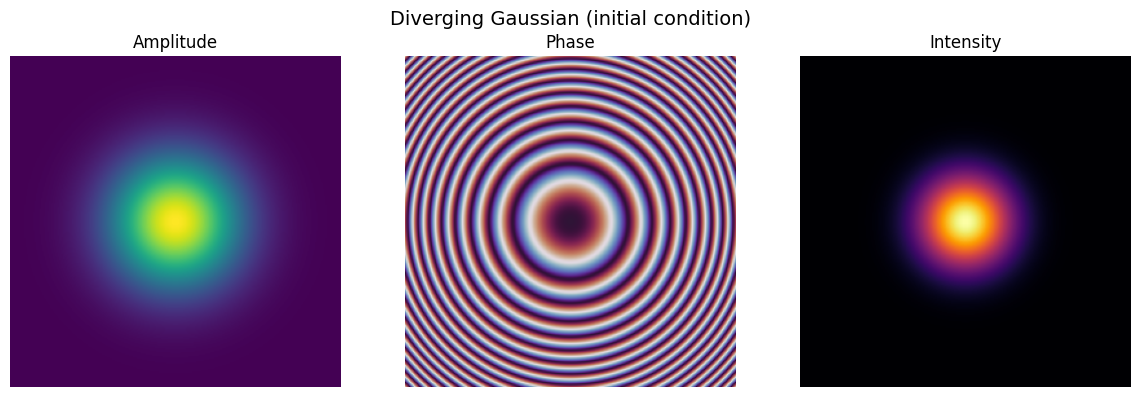

In [8]:
diverging = jns.models.diverging_gaussian(
    wavelength=wavelength,
    dx=dx,
    grid_size=grid_size,
    waist=50e-6,
    source_distance=2e-3,
)
plot_optical_wavefront(diverging, "Diverging Gaussian (initial condition)")

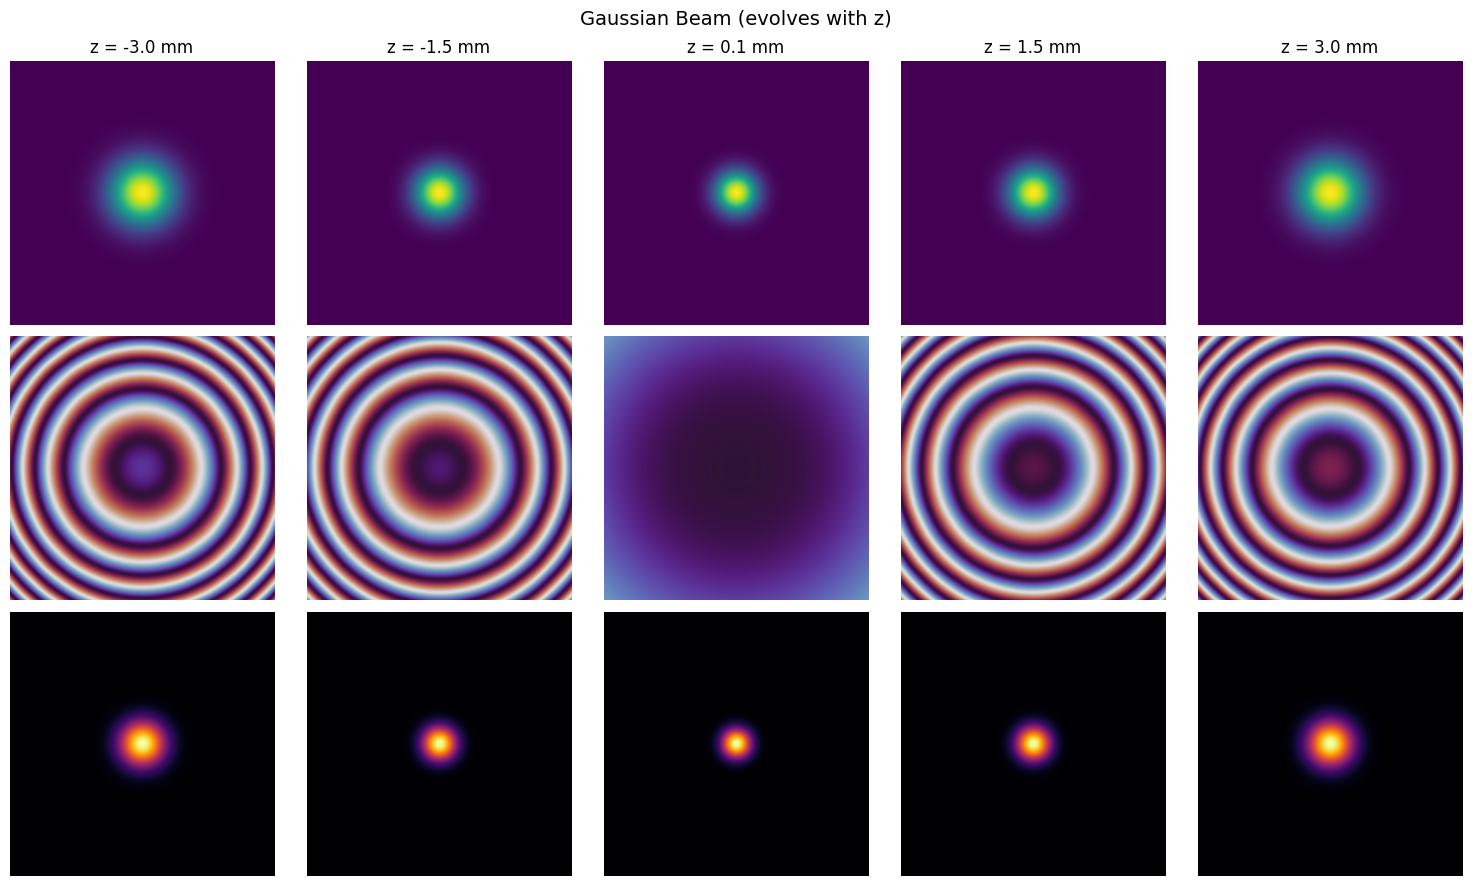

In [9]:
z_gaussian = jnp.linspace(-3e-3, 3e-3, 50)
gaussian = jns.models.propagate_beam(
    beam_type="gaussian_beam",
    z_positions=z_gaussian,
    wavelength=wavelength,
    dx=dx,
    grid_size=grid_size,
    waist_0=20e-6,
)
plot_propagating_wavefront(gaussian, "Gaussian Beam (evolves with z)")

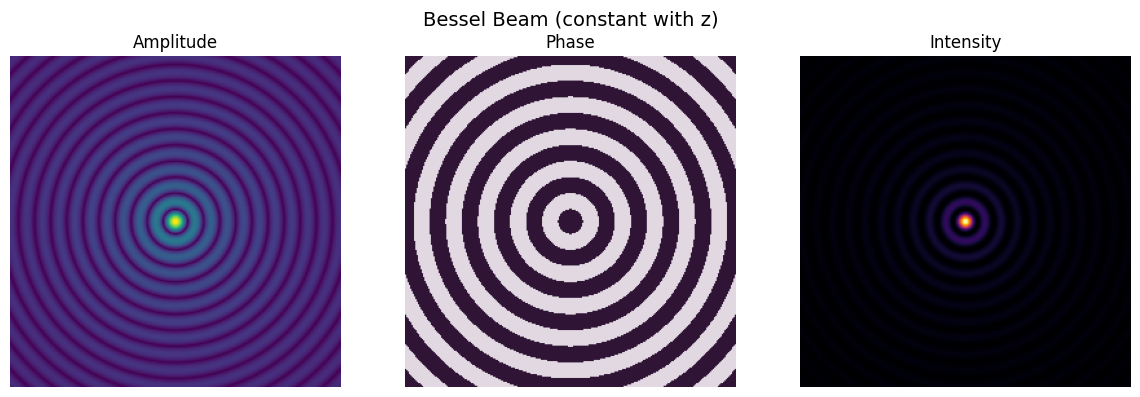

In [10]:
bessel = jns.models.bessel_beam(
    wavelength=wavelength,
    dx=dx,
    grid_size=grid_size,
    cone_angle=0.02,
)
plot_optical_wavefront(bessel, "Bessel Beam (constant with z)")

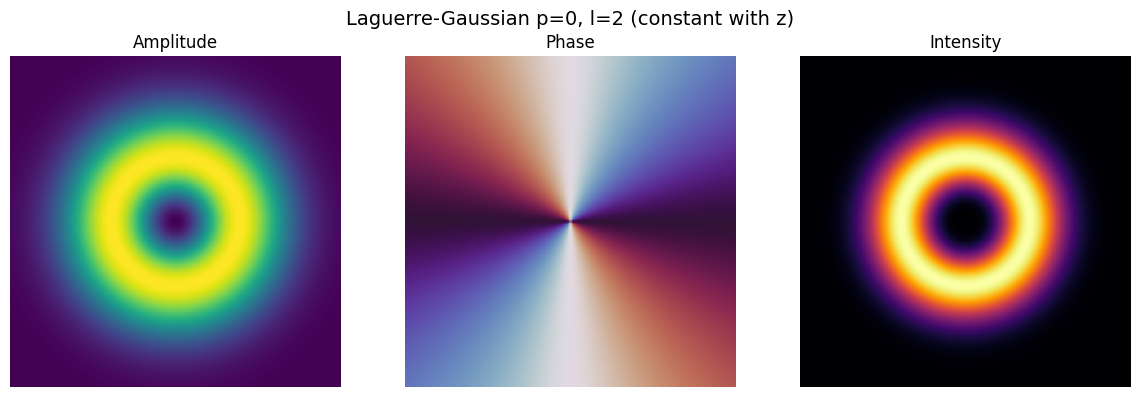

In [11]:
laguerre = jns.models.laguerre_gaussian(
    wavelength=wavelength,
    dx=dx,
    grid_size=grid_size,
    waist=50e-6,
    p=0,
    l=2,
)
plot_optical_wavefront(
    laguerre, "Laguerre-Gaussian p=0, l=2 (constant with z)"
)

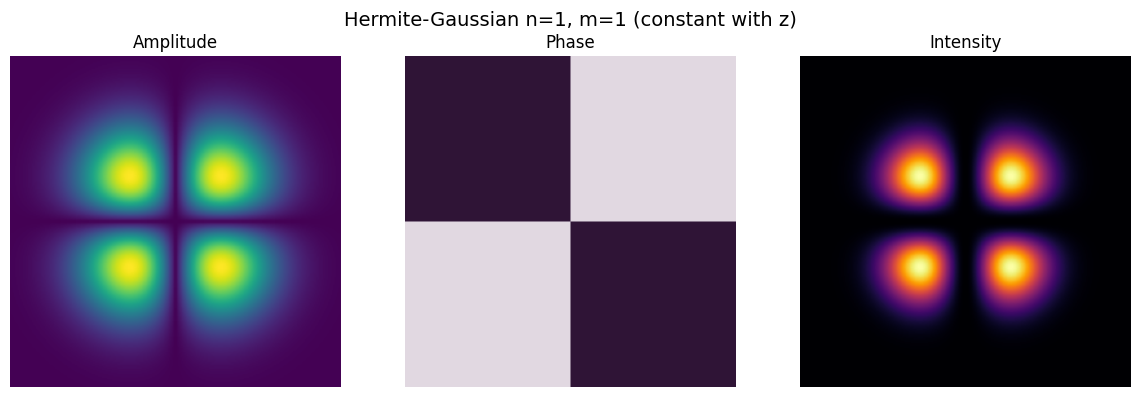

In [12]:
hermite = jns.models.hermite_gaussian(
    wavelength=wavelength,
    dx=dx,
    grid_size=grid_size,
    waist=50e-6,
    n=1,
    m=1,
)
plot_optical_wavefront(hermite, "Hermite-Gaussian n=1, m=1 (constant with z)")

## Publication Figures

Generate publication-quality figures for the supplemental materials.

In [13]:
# Configure matplotlib for publication figures
# IEEE two-column format: 7" wide, 10pt font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['TeX Gyre Heros']
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'TeX Gyre Heros'
plt.rcParams['mathtext.it'] = 'TeX Gyre Heros:italic'
plt.rcParams['mathtext.bf'] = 'TeX Gyre Heros:bold'

plt.rcParams['font.size'] = 6
plt.rcParams['axes.titlesize'] = 7
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 5
plt.rcParams['xtick.labelsize'] = 5
plt.rcParams['ytick.labelsize'] = 5
plt.rcParams['legend.fontsize'] = 6
plt.rcParams['figure.titlesize'] = 7

import string

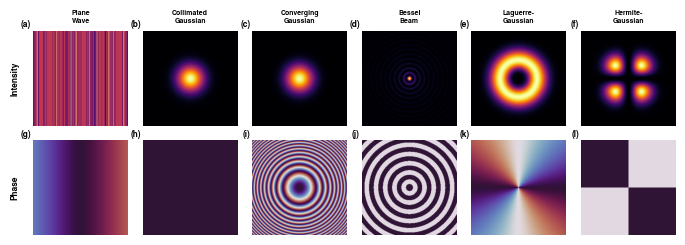

Saved: Figures/beams_publication_figure.pdf


In [14]:
# Create publication figure showing all beam types
# Layout: 2 rows (intensity, phase) x 6 columns (beam types) - horizontal layout

fig, axes = plt.subplots(2, 6, figsize=(7, 2.4))  # Full two-column width

# Generate all beam types
beams = [
    ("Plane\nWave", jns.models.plane_wave(
        wavelength=wavelength, dx=dx, grid_size=grid_size, tilt_x=0.001)),
    ("Collimated\nGaussian", jns.models.collimated_gaussian(
        wavelength=wavelength, dx=dx, grid_size=grid_size, waist=50e-6)),
    ("Converging\nGaussian", jns.models.converging_gaussian(
        wavelength=wavelength, dx=dx, grid_size=grid_size, waist=50e-6, focus_distance=2e-3)),
    ("Bessel\nBeam", jns.models.bessel_beam(
        wavelength=wavelength, dx=dx, grid_size=grid_size, cone_angle=0.02)),
    ("Laguerre-\nGaussian", jns.models.laguerre_gaussian(
        wavelength=wavelength, dx=dx, grid_size=grid_size, waist=50e-6, p=0, l=2)),
    ("Hermite-\nGaussian", jns.models.hermite_gaussian(
        wavelength=wavelength, dx=dx, grid_size=grid_size, waist=50e-6, n=1, m=1)),
]

for col, (name, wf) in enumerate(beams):
    field = wf.field
    intensity = jnp.abs(field)**2
    phase = jnp.angle(field)
    
    # Intensity (top row)
    axes[0, col].imshow(intensity, cmap='inferno')
    axes[0, col].axis('off')
    axes[0, col].set_title(name, fontsize=5, fontweight='bold')
    
    # Phase (bottom row)
    axes[1, col].imshow(phase, cmap='twilight', vmin=-jnp.pi, vmax=jnp.pi)
    axes[1, col].axis('off')

# Row labels
axes[0, 0].text(-0.15, 0.5, 'Intensity', transform=axes[0, 0].transAxes,
                fontsize=6, fontweight='bold', va='center', ha='right', rotation=90)
axes[1, 0].text(-0.15, 0.5, 'Phase', transform=axes[1, 0].transAxes,
                fontsize=6, fontweight='bold', va='center', ha='right', rotation=90)

# Add panel labels (a-l)
for i, ax in enumerate(axes.flat):
    label = string.ascii_lowercase[i]
    ax.text(-0.02, 1.02, f'({label})', transform=ax.transAxes,
            fontsize=6, fontweight='bold', va='bottom', ha='right')

plt.tight_layout()
plt.subplots_adjust(left=0.06, wspace=0.08, hspace=0.15)

# Save figure
plt.savefig('Figures/beams_publication_figure.pdf', dpi=300, bbox_inches='tight', pad_inches=0.02)
plt.savefig('Figures/beams_publication_figure.png', dpi=300, bbox_inches='tight', pad_inches=0.02)
plt.show()

print("Saved: Figures/beams_publication_figure.pdf")

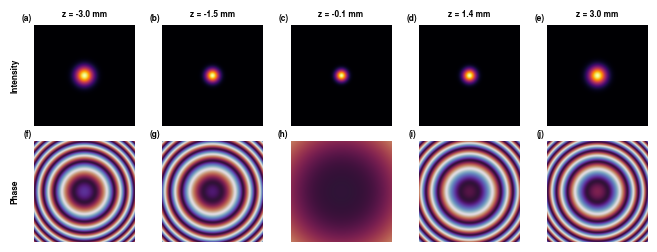

Saved: Figures/gaussian_propagation_figure.pdf


In [15]:
# Create propagation figure showing Gaussian beam evolution
# This shows how the beam evolves through focus

z_positions = jnp.linspace(-3e-3, 3e-3, 50)
gaussian_beam = jns.models.propagate_beam(
    beam_type="gaussian_beam",
    z_positions=z_positions,
    wavelength=wavelength,
    dx=dx,
    grid_size=grid_size,
    waist_0=20e-6,
)

# Select 5 z positions to show
z_indices = [0, 12, 24, 36, 49]

fig, axes = plt.subplots(2, 5, figsize=(7, 2.5))  # Full width

for col, z_idx in enumerate(z_indices):
    field = gaussian_beam.field[z_idx]
    intensity = jnp.abs(field)**2
    phase = jnp.angle(field)
    z_mm = gaussian_beam.z_positions[z_idx] * 1e3
    
    # Intensity (top row)
    axes[0, col].imshow(intensity, cmap='inferno')
    axes[0, col].axis('off')
    axes[0, col].set_title(f'z = {z_mm:.1f} mm', fontsize=6)
    
    # Phase (bottom row)
    axes[1, col].imshow(phase, cmap='twilight', vmin=-jnp.pi, vmax=jnp.pi)
    axes[1, col].axis('off')

# Row labels
axes[0, 0].text(-0.15, 0.5, 'Intensity', transform=axes[0, 0].transAxes,
                fontsize=6, fontweight='bold', va='center', ha='right', rotation=90)
axes[1, 0].text(-0.15, 0.5, 'Phase', transform=axes[1, 0].transAxes,
                fontsize=6, fontweight='bold', va='center', ha='right', rotation=90)

# Panel labels
for i, ax in enumerate(axes.flat):
    label = string.ascii_lowercase[i]
    ax.text(-0.02, 1.02, f'({label})', transform=ax.transAxes,
            fontsize=6, fontweight='bold', va='bottom', ha='right')

plt.tight_layout()
plt.subplots_adjust(left=0.08, wspace=0.05, hspace=0.15)

# Save
plt.savefig('Figures/gaussian_propagation_figure.pdf', dpi=300, bbox_inches='tight', pad_inches=0.02)
plt.savefig('Figures/gaussian_propagation_figure.png', dpi=300, bbox_inches='tight', pad_inches=0.02)
plt.show()

print("Saved: Figures/gaussian_propagation_figure.pdf")